# Исследование закономерностей, определяющих успешность игр

# Описание проекта:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Цель исследования:

- *Получить информацию, сколько игр выпускалось в разные годы*
- *Найти зависимость продаж от платформы*
- *Понять как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков*
- *Выявить определяющие успешность игры закономерности*

# Ход исследования:
    
1. *Обзор данных.*
2. *Предобработка данных.*
3. *Исследовательский анализ данных.*
4. *Портрет пользователя каждого региона.*
5. *Проверка гипотез.*
6. *Общий вывод.*

# Описание данных:

***Описание данных*** 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# открываем файл из директории или по ссылке
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14496,World Sports Competition,PS3,2009.0,Sports,0.02,0.00,0.0,0.01,NaN,NaN,NaN
5913,Spirit: Stallion of the Cimarron,GBA,2002.0,Platform,0.21,0.08,0.0,0.01,46.0,tbd,E
8239,Gretzky NHL 2005,PS2,2004.0,Sports,0.08,0.07,0.0,0.02,66.0,9.1,E
6548,Lemony Snicket's A Series of Unfortunate Events,GC,2004.0,Platform,0.20,0.05,0.0,0.01,NaN,NaN,NaN
9586,Torino 2006,PS2,2006.0,Sports,0.06,0.05,0.0,0.02,NaN,NaN,NaN


In [4]:
# выведем info по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
# проверим кол-во пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


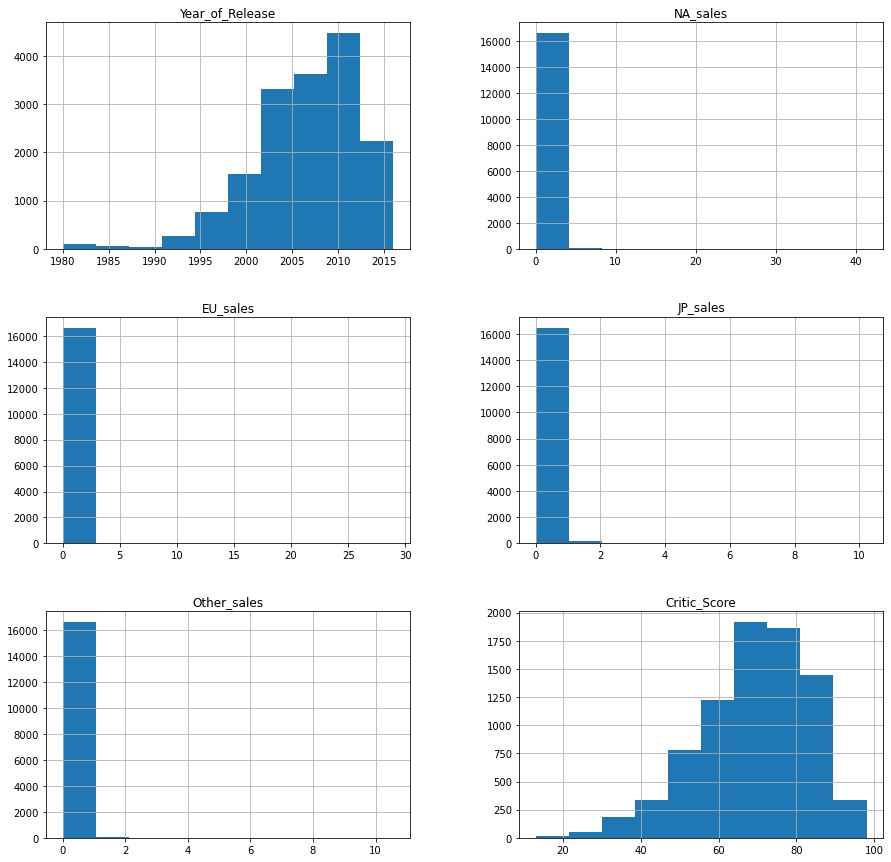

In [7]:
# построим гистораммы для датасета
data.hist(figsize=(15, 15))
plt.show()

***Вывод: В датасете представлены игру, которые были выпущены в период 1980 - 2016. Аномалий в данных не замечено. Столбец User_Scrore нужно привести с вещественному типу. Также необходимо преобразовать названия столбцов к нижнему регистру. Более 50% пропусков в столбце с оценкой критиков. По 40% в столбцах User_Score и Rating. Пропуски необходимо обработать.***

## Предобработка данных

### Стиль колонок

Приведем столбцы к нижнему регистру

In [8]:
# Переименуем столбцы
data.rename(str.lower, axis='columns', inplace=True)
# Проверим переименование
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [9]:
# Посчитаем пропуски значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

***В 6 столбцах присутствуют пропуски:***

- name: 2 пропуска не повлияют на исследование, оставим.
- year_of_release: 269 пропусков не повлияют на исследование, оставим.
- genre: 2 пропуска не повлияют на исследование, оставим.
- critic_score: 8578 пропусков. 5% игр не имеют оценки критиков. Заполнить значения нечем, оставим пропуски.
- user_score: 6701 пропуск. 4% игр не имеют оценки пользователей. Заполнить значения нечем, оставим пропуски.
- rating: 6766 пропусков. 4% игр не имеют возрастной категории. Для корректности выводов, пропуски в этом столбце поменяем на not rated.

In [10]:
# посмотрим на значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

***Видим, что есть пропуски и tbd. Что это не понятно, поэтому посмотрим сколько раз повторяется это значение и запишем его в пропуски***

In [11]:
len(data[data['user_score'] == 'tbd'])

2424

In [12]:
# Заменим значения tbd на пропуски
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

# Проверим новое количество пропусков в столбце
data['user_score'].isna().sum()

9125

In [13]:
# посмотрим на значения в столбце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
# Заполним пропуски в столбце rating значением not rated
data.loc[data['rating'].isna(), 'rating'] = 'not_rated'

In [15]:
# Проверим заполнение пропусков
data['rating'].isna().sum()

0

### Меняем типы данных

Заменим тип данных в столбце user_score на вещественный

In [16]:
# заменяем
data['user_score'] = data['user_score'].astype('float64')

In [17]:
# проверяем
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Устраняем дубликаты

In [18]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют

In [19]:
data.duplicated(subset=['name', 'platform'], keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

***Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.***

In [20]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [21]:
data['total_sales'] = (
    data['na_sales']
    + data['eu_sales']
    + data['jp_sales']
    + data['other_sales']
)                   

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_rated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_rated,31.38


***Вывод:***

***Исправлены стили заголовков, обработаны пропуски в столбце rating, убрали нечисловые значения в столбце user_score, исправили тип данных столбца user_score. Выяснили, что явные дубликаты в датафрейме отсутствуют. Создали новый столбец с сумарными продажами по всем регионам***

## Исследовательский анализ

### ***Посмотрим, сколько игр выпускалось в разные годы.***

In [23]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

In [24]:
#data.duplicated(subset=['year_of_release', 'name'], keep = 'first')
game_years = data.drop_duplicates(subset=['year_of_release', 'name'], keep = 'first')
len(game_years)

12428

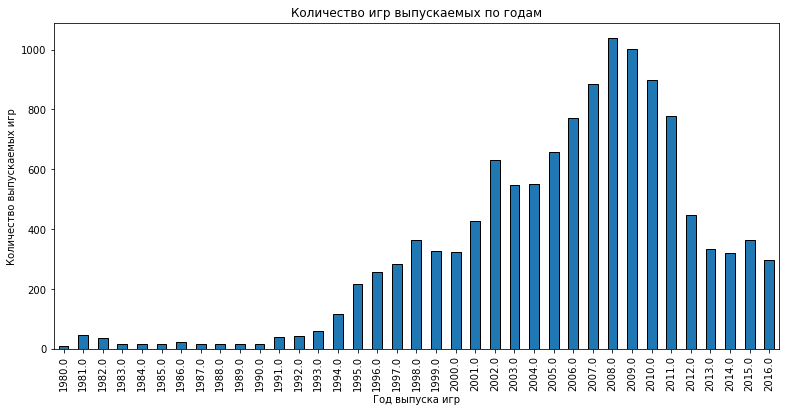

In [25]:
game_years.groupby('year_of_release')['name'].count()\
.plot(y='name', kind='bar',figsize=(13,6), title = 'Количество игр выпускаемых по годам', ec='black')\
.set(xlabel = 'Год выпуска игр', ylabel = 'Количество выпускаемых игр');

***Вывод: Больше всего игр было выпущено в 2008 и 2009г. На графике виден рост в период с 1994 года - это время выхода Sony PlayStation. До 2008 года каждый год выпуск игр увеличивался. После 2008 года наблюдается резкий спад выпуска игр. Возможно, это связано с мировым кризисом. Обратный рост начался с 2013 года и выпуск игр увеличивался из года в год. Учитывая, что данные за 2016 год неполные, можно предположить, что выпуск игр по итогам 2016 года будет на уровне 2015 года.***

***В рамках исследования стоит рассматривать период начиная с 2013 года. Большой рост количетсва выпускаемых игр до 2008 года и восстановление рынка после кризиса 2008-2012 годов не дадут сделать точный прогноз на 2017 год.***

### Посмотрим, как менялись продажи по платформам. 

Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.

In [26]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

***Вывод: Лидером ТОП-10 является play station 2.***

Возьмем топ-5 платформ и построим график
- PS2 — Sony PlayStation 2;
- X360 — Microsoft Xbox 360;
- PS3 — Sony PlayStation 3;
- Wii — Nintendo Wii;
- DS — Nintendo DS.

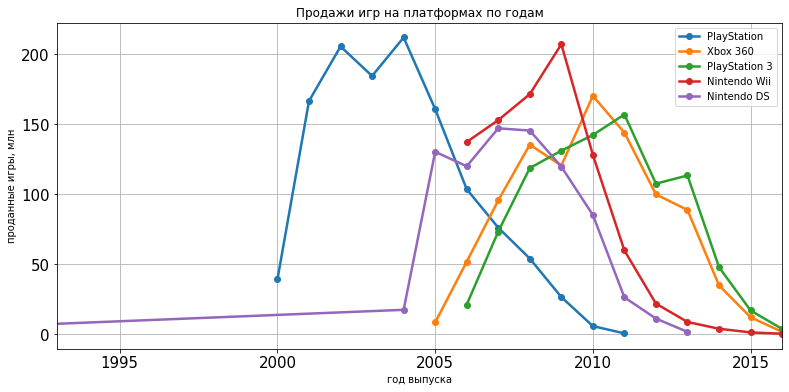

In [27]:
# Список платформ топ-5

tmp = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values('total_sales', ascending=False)
top_platforms = tmp.index[:5].tolist()
#top_platforms = ["PS2", "X360", "PS3", "Wii", "DS"]

# Построим графики продаж игр по годам для выбранных платформ
for top in top_platforms:
    (
        data.loc[data['platform'] == top]
        .groupby('year_of_release')['total_sales']
        .sum()
        .plot(figsize=(13, 6), grid=True, style='o-', kind='line', fontsize=15, linewidth=2.5, legend=True)
    )
plt.title('Продажи игр на платформах по годам')
plt.xlabel('год выпуска')
plt.xlim(1993, 2016)
plt.ylabel('проданные игры, млн')
plt.legend(
    ["PlayStation",
    "Xbox 360",
    "PlayStation 3",
    "Nintendo Wii",
    "Nintendo DS",
    "PlayStation",
    "Game Boy Advance"]
)
plt.show()

На графике сильно бросается в глаза отрезок для Nintendo DS. По официальным данным консоль Nintendo DS была анонсирована в 2004 году. Посмотрим что за игра была выпущена ранее 2004г и приписана к консоли Nintendo DS

In [28]:
data.query('platform == "DS" & year_of_release < 2004').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,not_rated,0.02


Shogi (сёги) - это японские шахматы, в 80-х годах 20 века начались разработки компьютерных программ, которые могут играть в сёги.

Можно предположить, что "Strongest Tokyo University Shogi" - какая-то компьютерная игра в сёги которая разрабатывалась в Токийском Университете, при этом никакого отношения к платформе Nintendo DS она не имеет, потому что в 1985 году этой платформы еще не было.

Т.к. строка содержит ошибочные данные удалим ее.

In [29]:
data = data.drop(index=[15957]).reset_index(drop=True)

***Вывод: На графике представлены "сроки жизни" платформ. Вышедшую в 1994 году Sony PlayStation в 2000 году сменяет Sony PlayStation 2. Параллельно ей с 2001 по 2006 годы существует портативная приставка Nintendo Game Boy Advance. На смену Sony PlayStation 2 в 2006 году приходит Sony PlayStation 3. Практически одновременно с Sony PlayStation 3 на рынке представлены портативная Nintendo DS, Nintendo Wii, Microsoft Xbox 360. 
"Срок жизни" платформ со временем растет. Видно, что платформы Sony PlayStation и Sony PlayStation 2 были актуальны около 6 лет. Платформы Sony PlayStation 3 и конкуренты актуальны около 8 лет. Предположительно, с 2013 года начали развиваться платформы следующего поколения. К 2016 году они должны находиться близко к пику популярности.
Таким образом, подтверждается правильность выбора актуального периода для проведения дальнейшего исследования. Рассматривая период с 2013 по 2016 год мы оценим продажи игр для находящихся возле пиков популярности современных платформ. Это поможет сделать корректный прогноз на 2017 год.***

### Глобальные продажи по платформам

Посмотрим, как менялись глобальные продажи по платформам за период с 2013 по 2016 годы.

In [30]:
# Соберем данные за актуальный период в новый датафрейм

data_actual = data.query('year_of_release >= 2013')

# На актуальных данных для каждой платформы узнаем продажи по годам
(
    data_actual.pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales',
        aggfunc='sum',
        fill_value=0)
    .style
    .highlight_max(color='lightgreen', axis=1)
)

year_of_release,2013.000000,2014.000000,2015.000000,2016.000000
platform,,,,
3DS,56.570000,43.760000,27.780000,15.140000
DS,1.540000,0.000000,0.000000,0.000000
PC,12.380000,13.280000,8.520000,5.250000
PS3,113.250000,47.760000,16.820000,3.600000
PS4,25.990000,100.000000,118.900000,69.250000
PSP,3.140000,0.240000,0.120000,0.000000
PSV,10.590000,11.900000,6.250000,4.250000
Wii,8.590000,3.750000,1.140000,0.180000
WiiU,21.650000,22.030000,16.350000,4.600000


***Вывод: В актуальный период по глобальным продажам игр лидируют Sony PlayStation 4 и Microsoft Xbox One. Из таблицы видно, что эти приставки набирают популярность и были лидерами в 2015 году, а также показывают лучшие результаты в 2016 году. Поскольку данные за 2016 год неполные, мы не можем сделать вывод по итогам года, однако, тренд сохраняется.
Приставки Nintendo 3DS, Sony PlayStation 3, Microsoft Xbox 360, Nintendo Wii утрачивает популярность, поскольку им на смену уже пришло новое поколение приставок. Ориентироваться на эти платформы не стоит.
Персональные компьютеры, Sony PlayStation Vita и Nintendo Wii U актуальны, но продажи игр для этих платформ не снижаются.
Nintendo DS и Sony PlayStation Portable в 2016 году уже окончательно выбыли из гонки.***

In [31]:
(
data_actual.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .style
    .highlight_max(color='lightgreen', axis=1)
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.000000,56.570000,1.540000,12.380000,113.250000,25.990000,3.140000,10.590000,8.590000,21.650000,88.580000,18.960000
2014.000000,43.760000,nan,13.280000,47.760000,100.000000,0.240000,11.900000,3.750000,22.030000,34.740000,54.070000
2015.000000,27.780000,nan,8.520000,16.820000,118.900000,0.120000,6.250000,1.140000,16.350000,11.960000,60.140000
2016.000000,15.140000,nan,5.250000,3.600000,69.250000,nan,4.250000,0.180000,4.600000,1.520000,26.150000


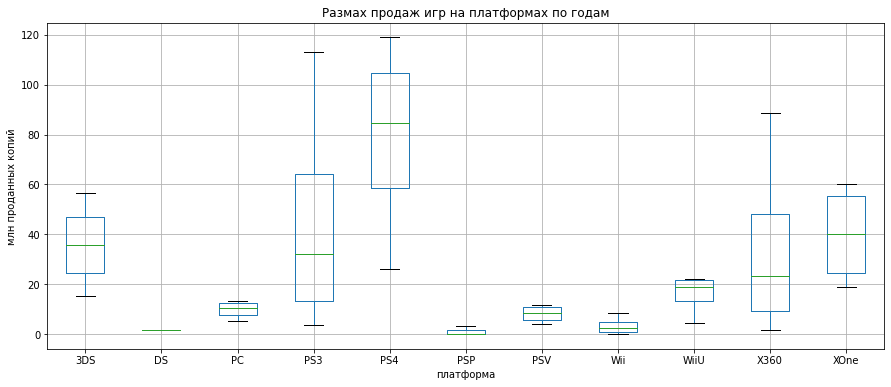

In [32]:
# Построим диаграмму размаха
(
    data_actual.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum')
    .boxplot(figsize=(15, 6))
)
plt.title('Размах продаж игр на платформах по годам')
plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.show()

***Вывод: На диаграмме размаха видно, что медианы продаж в год на новых платформах (Sony PlayStation 4 и Microsoft Xbox One) намного выше медиан продаж соответствующих старых платформ (Sony PlayStation 3 и Microsoft Xbox 360).***

### Влияние отзывов на продажи

Изучим влияние отзывов на продажи игр. Рассмотрим на примере самой популярной в актуальный период платформы Sony PlayStation 4.

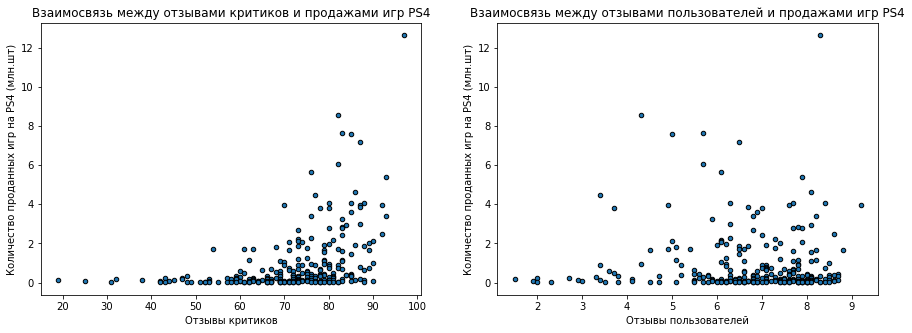

In [33]:
# Построим диаграммы рассеяния, показывающие взаимосвязь между отзывами и продажами
rows = 1
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,5))
#сделали общий список по отзывам пользователей и критиков
score_list = ['critic_score', 'user_score']
data_ps4 = data_actual.query('platform == "PS4"')

count = 0
# проходимся циклом по строкам и стобца и для каждого score строим график
for r in range(rows):
    for i in range(cols):
        title_dict = {'critic_score':'Взаимосвязь между отзывами критиков и продажами игр PS4',\
                      'user_score':'Взаимосвязь между отзывами пользователей и продажами игр PS4'}
        xlabel_dict = {'critic_score':'Отзывы критиков', 'user_score':'Отзывы пользователей'}
        ax = data_ps4.plot(kind = 'scatter', x = score_list[count], y = 'total_sales',\
                            ax=axes[i], ec='black', title = title_dict[score_list[count]])\
        .set(xlabel = xlabel_dict[score_list[count]], ylabel = 'Количество проданных игр на PS4 (млн.шт)')
        count += 1

***Вывод: Судя по диаграмме, при исследовании оценки критиков наблюдается прямая, средне-слабая корреляция с цифрами продаж. Оценки пользователей корреляции с продажами не имеют.***

Построим матрицу корреляции

In [34]:
# Получаем матрицу корреляции
corr_matrix = data_ps4[['critic_score', 'user_score', 'total_sales']].corr()
corr_matrix

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


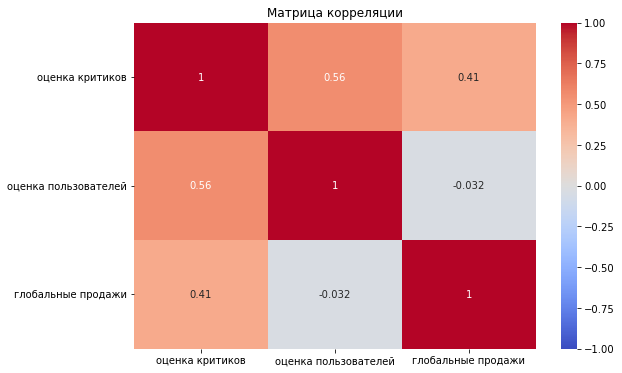

In [35]:
# Получаем матрицу корреляции
corr_matrix = data_ps4[['critic_score', 'user_score', 'total_sales']].corr()


# названия параметров
correlation_labels = [
    'оценка критиков',
    'оценка пользователей',
    'глобальные продажи'
]

# Визуализируем матрицу корреляции
plt.figure(figsize=(9, 6))
sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    yticklabels=correlation_labels,
    xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show()

Средняя положительная линейная связь отмечается между оценкой критиков и глобальными продажами. Чем выше оценки, тем выше продажи.

Проверим для других платформ, действительно ли игры с высокими оценками лучше продаются.

In [36]:
# Получим средние оценки игр критиками на каждой платформе
(
    data_actual.groupby('platform')['critic_score']
    .mean()
    .sort_values(ascending=False)
)

platform
PC      75.550336
PSP     74.000000
XOne    73.325444
PS4     72.091270
WiiU    71.642857
PSV     71.636364
PS3     70.198347
X360    69.234568
3DS     68.338028
DS            NaN
Wii           NaN
Name: critic_score, dtype: float64

Самые высокие оценки игр отмечены на платформах PC и Sony PlayStation Portable. Ровное число для Sony PlayStation Portable дает основания полагать, что для платформы слишком мало оценок критиков в датафрейме. Проверим это.

In [37]:
# Получим количество оценок игр критиками на каждой платформе
(
    data_actual.groupby('platform')['critic_score']
    .count()
    .sort_values(ascending=False)
)

platform
PS4     252
XOne    169
PC      149
PS3     121
X360     81
PSV      77
3DS      71
WiiU     70
PSP       1
DS        0
Wii       0
Name: critic_score, dtype: int64

Да, всего одна оценка для Sony PlayStation Portable. Для платформы PC достаточно оценок, но рейтинг критиков гораздо выше, чем можно было бы ожидать при небольших продажах игр.

In [38]:
# Получаем матрицу корреляции
corr_matrix = data_actual.query('platform == "PC"')[['critic_score', 'user_score', 'total_sales']].corr()
corr_matrix

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


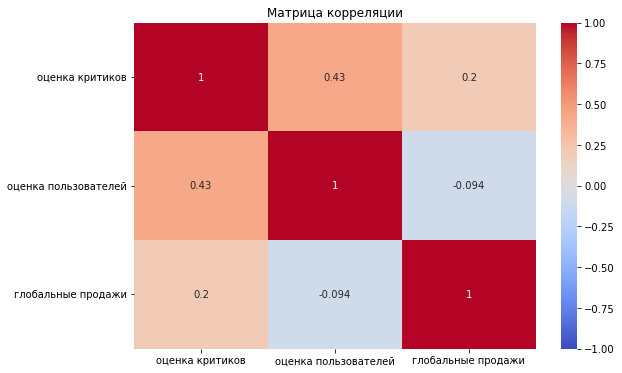

In [39]:
# Получаем матрицу корреляции
corr_matrix = data_actual.query('platform == "PC"')[['critic_score', 'user_score', 'total_sales']].corr()

# Составим список с названиями параметров
correlation_labels = [
    'оценка критиков',
    'оценка пользователей',
    'глобальные продажи'
]

# Визуализируем матрицу корреляции
plt.figure(figsize=(9, 6))
sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    yticklabels=correlation_labels,
    xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show()

***Вывод: Коэффициент корреляции между отзывами критиков и продажами для платформы PC в 2 раза ниже, чем для Sony PlayStation 4.
Опираться на корреляцию между оценками критиков и продажами игр для построения прогнозов не следует. Можно использовать в качестве дополнительного фактора принятия решений в случае платформ, для которых значение коэффициента корреляции выше и есть достаточно отзывов.***

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

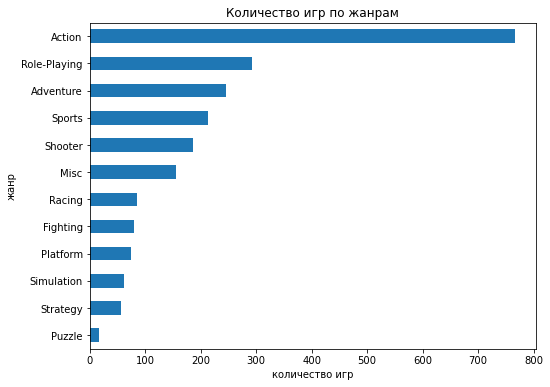

In [40]:
# Количество игр по жанрам
(
    data_actual.groupby('genre')['name']
    .count()
    .sort_values(ascending=True)
    .plot(kind='barh', x='genre', figsize=(8, 6))
)
plt.title('Количество игр по жанрам')
plt.xlabel('количество игр')
plt.ylabel('жанр')
plt.show()

***Вывод: Cамым популярным жанром является Action. Реже всего выпускаются игры в жанре Puzzle.***

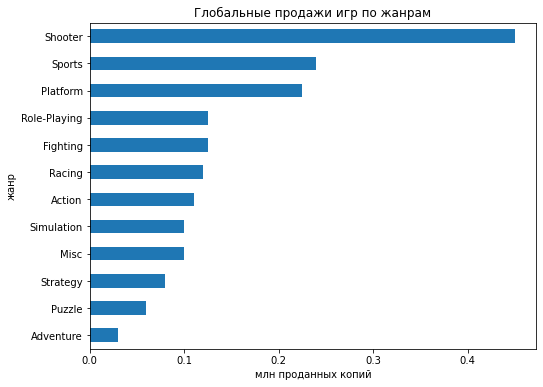

In [41]:
# Глобальные продажи игр по жанрам
(
    data_actual.groupby('genre')['total_sales']
    .median()
    .sort_values(ascending=True)
    .plot(kind='barh', x='genre', figsize=(8, 6))
)
plt.title('Глобальные продажи игр по жанрам')
plt.xlabel('млн проданных копий')
plt.ylabel('жанр')
plt.show()

***Наибольший доход приносят жанры Shooter и Sports. Количество проданных копий у этих жанров наибольшее.***


***Вывод:***

- актуальный период для исследования: 2013 - 2016 года

- самые популярные платформы на конец 2016 года - PS4, XOne, 3DS

- Самые полулярные жанры: Shooter, Sports.

### Составим портрет пользователя каждого региона

In [42]:
# напишем функцию для построения графиков
def region(column):
    rows = 1
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(18,5))
    #создадим общий список по продажам
    region_list = ['na_sales', 'eu_sales', 'jp_sales']
    count = 0
    # пройдемся циклом по строкам и столбцам и построим графики для регионов
    for r in range(rows):
        for i in range(cols):
            data_new = data_actual.pivot_table(index=column, values = region_list[count], aggfunc = 'sum')\
            .sort_values(by=region_list[count], ascending = False)[:5]
            title_dict = {'na_sales': 'Продажи в Северной Америке (млн.копий)',\
                          'eu_sales': 'Продажи в Европе (млн.копий)',\
                          'jp_sales': 'Продажи в Японии (млн.копий)'}
            color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'green'}
            plot = data_new.plot(kind='bar', ec='black', title=title_dict[region_list[count]], ax=axes[i],\
                             fontsize=13, color=color_dict[region_list[count]], rot=45)
            plot.set_xlabel('')
            count += 1

### Топ-5 платформ для каждого региона 

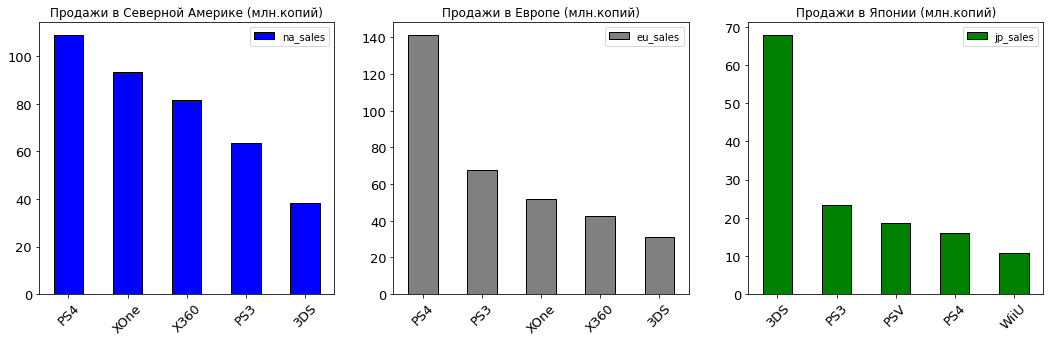

In [43]:
region('platform')


1. Северная Америка - имеют большую популярность платформы PS4, XOne и X360.

2. Европа - безоговорочный лидер PlayStation, в основном продаются игр для PS4 и PS3.

3. Япония - лидер 3DS, далее идут PS3 и PSV - в Японии портативные консоли гораздо популярнее стационарных.

### ТОП-5 жанров для каждого региона

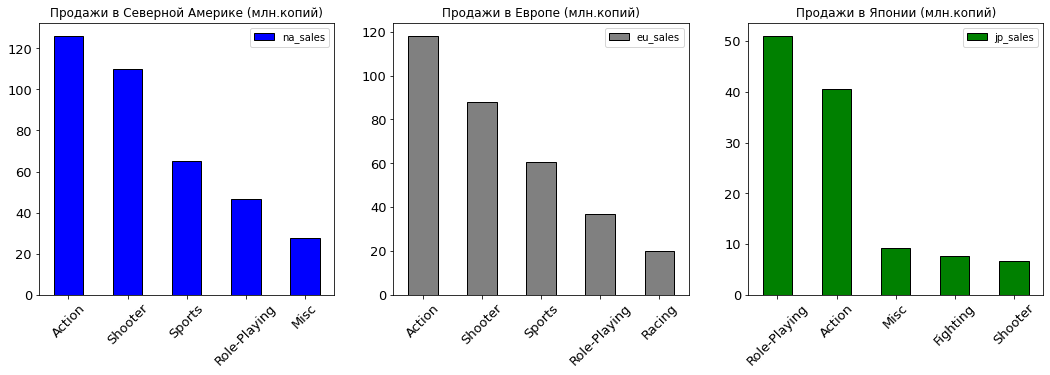

In [44]:
region('genre')

1. Северная Америка - имеют большую популярность жанры Action и Shooter.

2. Европа - имеют большую популярность жанры Action и Shooter.

3. Япония - лидеры Role-Playing и Action жанры.

### Влияние рейтинга ESRB на продажи в регионах

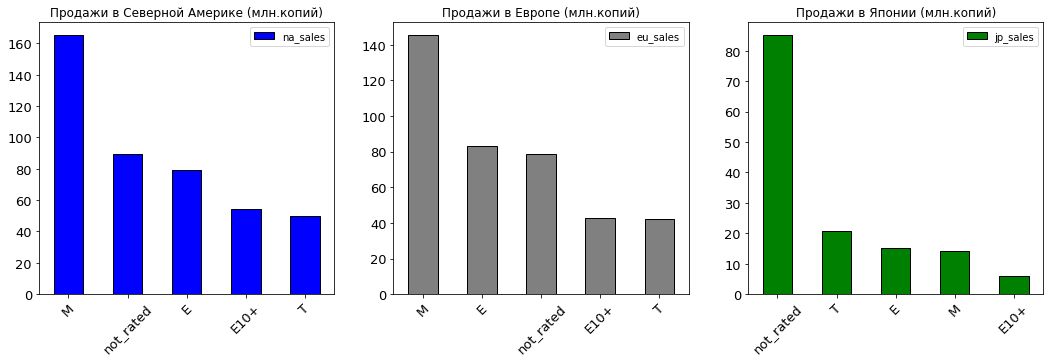

In [45]:
region('rating')

***Вывод: В Северной Америке и Европе прослеживается влияние рейтинга M (что означает возрастное ограничение). В Японии большая часть продаж без рейтинга ESRB.***

## Проверка гипотез

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Определим критический уровень статистической значимости alpha в 0.05.

In [46]:
# Оценки пользователей игр для платформы Xbox
xbox_user_score = (
    data_actual.query('platform == "XOne"')['user_score']
)

# Оценки пользователей игр для платформы PC
pc_user_score = (
    data_actual.query('platform == "PC"')['user_score']
)

# Уровень статистической значимости
alpha = 0.05

# Статистический тест (nan_policy='omit': игнорирует вхождения nan во входных данных)
results = st.ttest_ind(
    xbox_user_score, pc_user_score, nan_policy='omit', equal_var=True
)

# Интерпретация результата
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


***Вывод: У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. P-значение — 14%.***

H0: Средние пользовательские рейтинги жанров Action и Sports разные.

H1: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Определим критический уровень статистической значимости alpha в 0.05.

In [47]:
# Оценки пользователей игр для платформы Xbox
xbox_user_score = (
    data_actual.query('genre == "Action"')['user_score']
)

# Оценки пользователей игр для платформы PC
pc_user_score = (
    data_actual.query('genre == "Sports"')['user_score']
)

# Уровень статистической значимости
alpha = 0.05

# Статистический тест (nan_policy='omit': игнорирует вхождения nan во входных данных)
results = st.ttest_ind(
    xbox_user_score, pc_user_score, nan_policy='omit', equal_var=True
)

# Интерпретация результата
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.0517832389142297e-27
Отвергаем нулевую гипотезу


***Вывод: Принимаем альтернативную гипотезу. Полученное p-значение очень маленькое, вероятность получить такую разницу в оценках случайно почти нулевая.***

### Вывод:
У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.
Возможно, Microsoft стоит выпускать для Xbox больше эксклюзивных игр, которые могли быть оценены выше, чем общие игры для обеих платформ.

Наши данные не противоречат гипотезе: средние пользовательские рейтинги жанров Action и Sports различны.

# Общий вывод:

*В ходе исследований были выявлены закономерности, определяющие успешность игры.*

- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с цифрами продаж. Оценки пользователей корреляции с продажами не имеют

- Самые продаваемые жанры Shooter, Sports, Platform и Role-Playing

- По платформам лидируют PS4, XOne и 3DS, но каждые 6-7 лет платформы обновляются. Это надо учитывать.

- Самая продаваемая категория игр - категория "M" ("От 17 и старше")

*Портреты пользователей каждого региона:*

1. Портрет пользователя из Северной Америки - чаще покупает игры жанра Action, Shooter, Sports; играет на платформах PS4 и XOne

2. Портрет пользователя из Европы - жанра Action, Shooter, Sports; играет в основном на платформах PS4

3. Портрет пользователя из Японии - чаще покупает игры жанра Role-Playing или Action; играет на платформах 3DS

***Рекомендации для рекламных компаний***: 
В Северной Америке и Европе следует продвигать игры для платформ Sony PlayStation 4 и Microsoft Xbox One.
На рынке Японии следует продвигать игры для платформы Nintendo 3DS.
При выборе перспективных игр не следует полагаться на отзывы критиков и пользователей.